# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Loop cities dataframe, pulling API data for each iteration
cities = pd.DataFrame(cities)
weatherResults = []
url = "http://api.openweathermap.org/data/2.5/weather"

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities.iterrows(): 
    params = {
        "q": city[1][0],
        "appid": weather_api_key,
        "units": 'imperial',
    }
    
    print(f"Processing Record {city[0]} of Set 1 | {city[1][0]}")
    results = requests.get(url, params=params).json()
    weatherResults.append(results)
    time.sleep(.5)

sing Record 165 of Set 1 | cherskiy
Processing Record 166 of Set 1 | tuktoyaktuk
Processing Record 167 of Set 1 | tiksi
Processing Record 168 of Set 1 | dewas
Processing Record 169 of Set 1 | saint george
Processing Record 170 of Set 1 | tura
Processing Record 171 of Set 1 | victoria
Processing Record 172 of Set 1 | milkovo
Processing Record 173 of Set 1 | smirnykh
Processing Record 174 of Set 1 | linhares
Processing Record 175 of Set 1 | marsa matruh
Processing Record 176 of Set 1 | mafinga
Processing Record 177 of Set 1 | saskylakh
Processing Record 178 of Set 1 | pangnirtung
Processing Record 179 of Set 1 | leningradskiy
Processing Record 180 of Set 1 | baikunthpur
Processing Record 181 of Set 1 | westport
Processing Record 182 of Set 1 | cananeia
Processing Record 183 of Set 1 | saint-pierre
Processing Record 184 of Set 1 | vyzhnytsya
Processing Record 185 of Set 1 | sechura
Processing Record 186 of Set 1 | liepaja
Processing Record 187 of Set 1 | zyryanka
Processing Record 188 of 

In [28]:
cities[0][0]

'jammal'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.

* Display the DataFrame

In [15]:
# Covert to dataframe
weatherResultsDF = pd.DataFrame(weatherResults)
# Export to CSV
weatherResultsDF.to_csv('C:/temp/weatherData.csv')
# Clean data of any rows with nulls
weatherResultsDF = weatherResultsDF.dropna(how="all")
# Display cleaned data
weatherResultsDF.head()

,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,id,name,cod,message,snow,rain
0,"{'lon': 10.76, 'lat': 35.62}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 65.1, 'feels_like': 59.5, 'temp_min':...",8000.0,"{'speed': 10.29, 'deg': 350}",{'all': 100},1.580052e+09,"{'type': 1, 'id': 1193, 'country': 'TN', 'sunr...",3600.0,2470191.0,Djemmal,200,NaN,NaN,NaN
1,"{'lon': 115.33, 'lat': -33.65}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 71.35, 'feels_like': 62.94, 'temp_min...",NaN,"{'speed': 12.08, 'deg': 143}",{'all': 0},1.580052e+09,"{'type': 3, 'id': 2011706, 'country': 'AU', 's...",28800.0,2075265.0,Busselton,200,NaN,NaN,NaN
2,"{'lon': 141.43, 'lat': -31.95}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 78.8, 'feels_like': 69.57, 'temp_min'...",10000.0,"{'speed': 13.87, 'deg': 170}",{'all': 0},1.580052e+09,"{'type': 1, 'id': 9491, 'country': 'AU', 'sunr...",37800.0,2173911.0,Broken Hill,200,NaN,NaN,NaN
3,"{'lon': 147.33, 'lat': -42.88}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 57.36, 'feels_like': 45.63, 'temp_min...",10000.0,"{'speed': 14.99, 'deg': 320}",{'all': 100},1.580052e+09,"{'type': 1, 'id': 9545, 'country': 'AU', 'sunr...",39600.0,2163355.0,Hobart,200,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,city not found,NaN,NaN


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

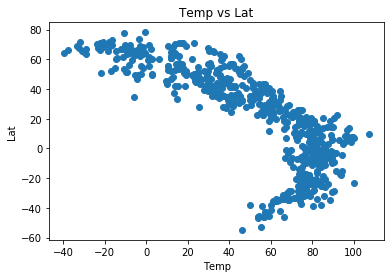

In [11]:
# Define list containers for data
x = []
y = []

# Loop over dataframe, populating x and y lists with values from specific fields
for index,weatherResult in weatherResultsDF.iterrows(): 
    try:
        x.append(weatherResultsDF['main'][index]['temp'])
        y.append(weatherResultsDF['coord'][index]['lat'])   
    except Exception:
        continue

# Build and show chart
plt.scatter(x, y, marker="o")
plt.title('Temp vs Lat')
plt.xlabel('Temp')
plt.ylabel('Lat')
plt.show()




#### Latitude vs. Humidity Plot

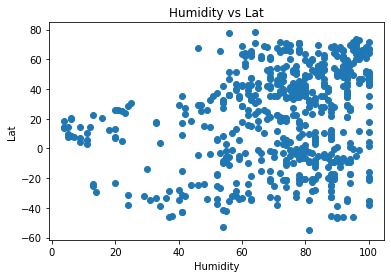

In [17]:
# Define list containers for data
x = []
y = []

# Loop over dataframe, populating x and y lists with values from specific fields
for index,weatherResult in weatherResultsDF.iterrows(): 
    try:
        x.append(weatherResultsDF['main'][index]['humidity'])
        y.append(weatherResultsDF['coord'][index]['lat'])   
    except Exception:
        continue

# Build and show chart   
plt.scatter(x, y, marker="o")
plt.title('Humidity vs Lat')
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.show()

#### Latitude vs. Cloudiness Plot

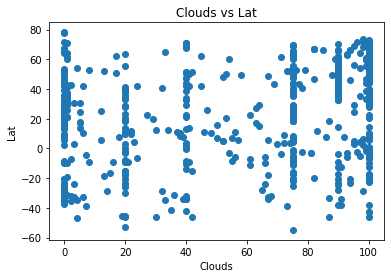

In [19]:
# Define list containers for data
x = []
y = []

# Loop over dataframe, populating x and y lists with values from specific fields
for index,weatherResult in weatherResultsDF.iterrows(): 
    try: 
        x.append(weatherResultsDF['clouds'][index]['all'])
        y.append(weatherResultsDF['coord'][index]['lat'])  
    except Exception:
        continue

# Build and show chart
plt.scatter(x, y, marker="o")
plt.title('Clouds vs Lat')
plt.xlabel('Clouds')
plt.ylabel('Lat')
plt.show()

#### Latitude vs. Wind Speed Plot

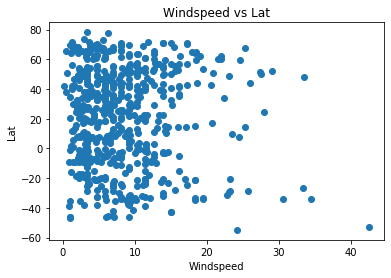

In [30]:
# Define list containers for data
x = []
y = []

# Loop over dataframe, populating x and y lists with values from specific fields
for index,weatherResult in weatherResultsDF.iterrows(): 
    try:
        x.append(weatherResultsDF['wind'][index]['speed'])
        y.append(weatherResultsDF['coord'][index]['lat'])   
    except Exception:
        continue

# Build and show chart
plt.scatter(x, y, marker="o")
plt.title('Windspeed vs Lat')
plt.xlabel('Windspeed')
plt.ylabel('Lat')
plt.show()

In [49]:
x = weatherResultsDF['coord']
~x['lon']

KeyError: 'lon'

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots


In [10]:
# Create Northern and Southern Hemisphere DataFrames
weatherResultsDR.loc[~weatherResultsDF['favorite_color'].isin(array)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression